In [28]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt


In [29]:
data = pd.read_csv("train.csv")

In [3]:
data.head()

,Unnamed: 0,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,pass_math,pass_reading,pass_writing,total_score,percentage,status,grades
0,0,0,2,1,1,1,72,72,74,1,1,1,218,73.0,1,B
1,1,0,3,4,1,0,69,90,88,1,1,1,247,83.0,1,A
2,2,0,2,3,1,1,90,95,93,1,1,1,278,93.0,1,O
3,3,1,1,0,0,1,47,57,44,1,1,1,148,50.0,1,D
4,4,1,3,4,1,1,76,78,75,1,1,1,229,77.0,1,B


In [39]:
x = data.iloc[:,6:9]
y = data.iloc[:,14]

In [40]:
print(x.shape,y.shape)
x.head()

(1000, 3) (1000,)


,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


[[0.         0.72581914]
 [1.         0.84552528]
 [1.         0.44225372]
 ...
 [1.         1.3799516 ]
 [1.         0.38722817]
 [2.         1.32914829]]


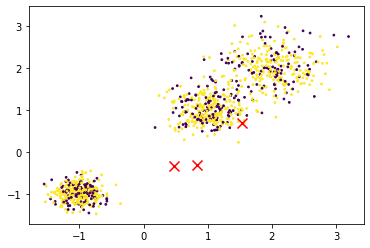

[[0.         0.10378593]
 [1.         0.19867556]
 [1.         0.63033663]
 ...
 [1.         0.53847629]
 [1.         0.47862436]
 [2.         0.34062654]]


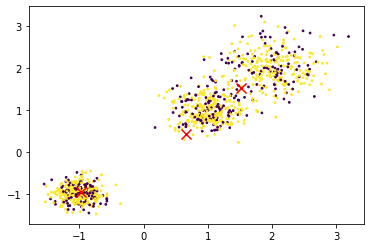

[[0.         0.44384835]
 [1.         0.49864034]
 [0.         0.34680267]
 ...
 [1.         0.38546794]
 [0.         0.5810888 ]
 [2.         0.36128666]]


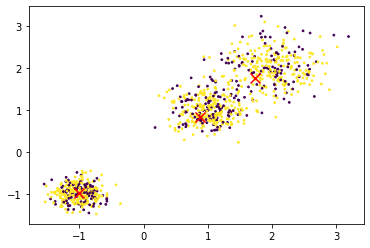

[[0.         0.59466574]
 [0.         0.62612026]
 [0.         0.22375463]
 ...
 [1.         0.46678208]
 [0.         0.45214844]
 [2.         0.36128666]]


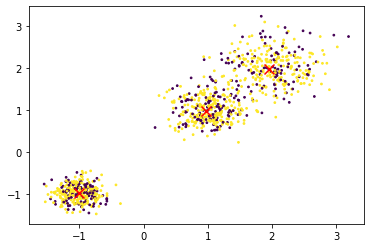

[[0.         0.64615094]
 [0.         0.57103862]
 [0.         0.18571561]
 ...
 [1.         0.51693997]
 [0.         0.40548411]
 [2.         0.36128666]]


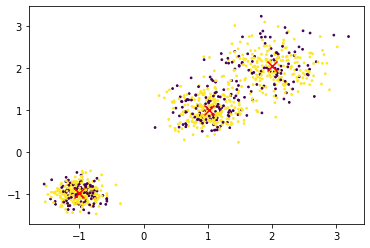

[[0.         0.656962  ]
 [0.         0.55979238]
 [0.         0.1801374 ]
 ...
 [1.         0.52682252]
 [0.         0.39707583]
 [2.         0.36128666]]


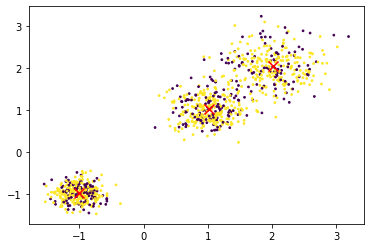

[[0.         0.6611081 ]
 [0.         0.55562415]
 [0.         0.17911523]
 ...
 [1.         0.53078007]
 [0.         0.3947612 ]
 [2.         0.36128666]]


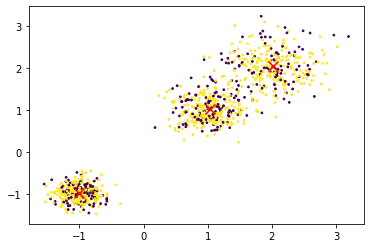

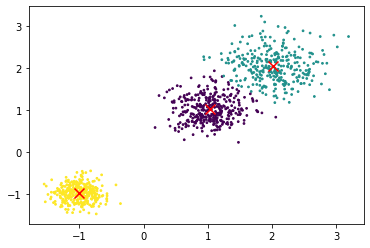

In [50]:


#新建数据集
def createData():
    X, y = make_blobs(n_samples=1000, n_features=2, centers=[[-1,-1],[1,1],[2,2]], cluster_std=[0.2,0.3,0.4])
    return X, y


#计算两个向量的距离
def calculateDistance(vecA, vecB):
    return np.sqrt(np.sum(np.square(vecA - vecB)))

#产生随机中心
def randomCenter(samples, K):
    m,n = np.shape(samples)
    centers = np.mat(np.zeros((K, n)))
    for i in range(n):
		    # 通过np.max获取i列最大值
        mxi = np.max(samples[:, i])
		    # 通过np.min获取i列最小值
        mni = np.min(samples[:, i])
        rangeI = mxi - mni
		    # 为簇中心第i列赋值
        centers[:, i] = np.mat(mni + rangeI * np.random.rand(K, 1))
    return centers


#k-means算法
def KMeans(dataset, k):
    m, n = np.shape(dataset)
    # 最后的返回结果，一共两维，第一维是所属类别，第二维是到簇中心的距离
    clusterPos = np.zeros((m, 2))
    
    centers = randomCenter(dataset, k)
    clusterChange = True
    while clusterChange:
        clusterChange = False
        # 遍历所有样本
        for i in range(m):
            minD = 10000000#设置一个最大初始值
            idx = -1
            # 遍历到各个簇中心的距离 找到最近的中心点
            for j in range(k):
                dis = calculateDistance(centers[j,:], dataset[i, :])
                if dis < minD:
                    minD = dis
                    idx = j
            
            # 如果所属类别发生变化
            if clusterPos[i,0] != idx:
                clusterChange = True
            
            # 更新样本聚类结果
            #第二维两个数字就是代表第几类，以及距离
            clusterPos[i,:] = idx, minD
#         print(clusterPos)
#         plt.clf()
#         plt.scatter(x[:,0],x[:,1],c=clusterRet[:,0] ,s=3,marker='o')
#         plt.scatter(centers[:, 0].A, centers[:, 1].A, c='red', s=100, marker='x')

#         plt.show()
        # 更新簇中心的坐标
#         print(clusterPos)
        for i in range(k):
            nxtClust = dataset[np.nonzero(clusterPos[:,0] == i)[0]]#找到该类的点
            centers[i,:] = np.mean(nxtClust, axis=0)#求平均值，并且更新中心
        
 
    return centers, clusterPos



if __name__=="__main__":

    x, y = createData()

    centers, clusterRet = KMeans(x, 3)
    plt.scatter(x[:,0],x[:,1],c=clusterRet[:,0] ,s=3,marker='o')
    plt.scatter(centers[:, 0].A, centers[:, 1].A, c='red', s=100, marker='x')
    plt.show()



In [52]:
x = data.iloc[:,6:9]
y = data.iloc[:,14]
x

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


c:\users\administrator\pycharmprojects\pythonproject\venv\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  """


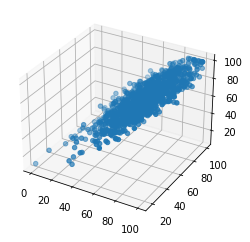

In [53]:
from mpl_toolkits.mplot3d import Axes3D

plt.clf()
fig = plt.gcf()
ax = fig.gca(projection='3d')  # 获取当前图
ax.scatter(x.iloc[:,0],x.iloc[:,1],x.iloc[:,2])
plt.show()

c:\users\administrator\pycharmprojects\pythonproject\venv\lib\site-packages\ipykernel_launcher.py:67: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().


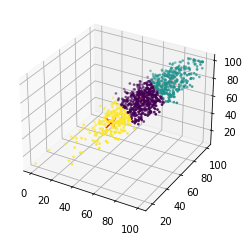

In [69]:
Iters =[]

# 计算两个向量的距离
def calculateDistance(vecA, vecB):
    return np.sqrt(np.sum(np.square(vecA - vecB)))


# 产生随机中心
def randomCenter(samples, K):
    m, n = np.shape(samples)
    centers = np.mat(np.zeros((K, n)))
    for i in range(n):
        # 通过np.max获取i列最大值
        mxi = np.max(samples[:, i])
        # 通过np.min获取i列最小值
        mni = np.min(samples[:, i])
        rangeI = mxi - mni
        # 为簇中心第i列赋值
        centers[:, i] = np.mat(mni + rangeI * np.random.rand(K, 1))
    return centers


# k-means算法
def KMeans(dataset, k):
    m, n = np.shape(dataset)
    # 最后的返回结果，一共两维，第一维是所属类别，第二维是到簇中心的距离
    clusterPos = np.zeros((m, 2))

    centers = randomCenter(dataset, k)
    clusterChange = True
    while clusterChange:
        clusterChange = False
        # 遍历所有样本
        for i in range(m):
            minD = 10000000  # 设置一个最大初始值
            idx = -1
            # 遍历到各个簇中心的距离 找到最近的中心点
            for j in range(k):
                dis = calculateDistance(centers[j, :], dataset[i, :])
                if dis < minD:
                    minD = dis
                    idx = j

            # 如果所属类别发生变化
            if clusterPos[i][0] != idx:
                clusterChange = True

            # 更新样本聚类结果
            # 第二维两个数字就是代表第几类，以及距离
            clusterPos[i, :] = idx, minD
        import copy
        Iters.append(copy.deepcopy(clusterPos))
        # 更新簇中心的坐标
        for i in range(k):
            nxtClust = dataset[np.nonzero(clusterPos[:, 0] == i)[0]]  # 找到该类的点
            centers[i, :] = np.mean(nxtClust, axis=0)  # 求平均值，并且更新中心
    return centers, clusterPos  # 返回中心点以及各点属于的类



x = np.array(x)
centers, clusterRet = KMeans(x, 3)


plt.clf()
fig = plt.gcf()
ax = fig.gca(projection='3d')  # 获取当前图
ax.scatter(x[:, 0], x[:, 1],x[:, 2], c=clusterRet[:, 0], s=3, marker='o')
ax.scatter(centers[:, 0].A, centers[:, 1].A, centers[:, 2].A, c='red', s=100, marker='x')

plt.show()


In [70]:
import lwlPackage

import  lwlPackage.变量存储与加载.varLD  as ST
ans = [x,Iters]
ST.saveData(ans,'k-means.npy')
len(Iters)

20

In [ ]:
lable = clusterRet[:, 0]
ans =[]
for i in lable:
    if(i == 0):
        ans.append('good')
    elif(i == 1):
        ans.append('medium')
    else:
        ans.append('bad')


In [8]:

data['lable'] = ans
data.head(20)
data.to_csv("k-meansAns.csv")

NameError: name 'ans' is not defined